# C-OPS data processing for C-HARRIER MISSIONS
## Batch processing for mission day C-AIR files

This script allows for fast and easy quicklooks of C-OPS radiometry data for data efficacy checks. The following script processes a full day of C-air air data, stitches them together, and plots the radiometric science data.

In [14]:
## IMPORT NECESSARY LIBRARIES 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib.dates as mdates
import re

### Inputs
In the following cell, input the sensor you wish to process (sensor), the path to the days files (path), the directory which contains the day's flight data (diry), the path which contains the missions C-air data (path), and the path where you wish to save the figure (outpath).

In [15]:
sensor = 'es'
diry = 'today20211028'
path = '/Users/jakravit/OneDrive - NASA/C-HARRIER_2021_C-AIR/C-AIR/'
outpath = '/Users/jakravit/Desktop/Cair_figs/'

### Read and plot data

The following cell reads through the directory, processing each time segment file for the given sensor, stiches the data together, plots and saves the figures. X-axis is in form Day : Hour : minutes

301182525.csv
301205425.csv
301201125.csv
301214925.csv
301193825.csv
301190525.csv
301194025.csv
301213125.csv
301173325.csv
301181825.csv
301211525.csv
301215025.csv
301192125.csv
301221425.csv
301175225.csv
301200825.csv
301203525.csv
301184425.csv
301180125.csv
301195925.csv
301212825.csv
301172825.csv
301184625.csv
301180325.csv
301203725.csv
301192325.csv
301221625.csv
301211725.csv
301215225.csv
301175025.csv
301213325.csv
301190725.csv
301194225.csv
301173125.csv
301205625.csv
301201325.csv
301182725.csv
301174925.csv
301173525.csv
301190325.csv
301194625.csv
301213725.csv
301182325.csv
301205225.csv
301201725.csv
301203325.csv
301184225.csv
301180725.csv
301175425.csv
301211325.csv
301215625.csv
301192725.csv
301221225.csv
301204925.csv
301183825.csv
301175625.csv
301192525.csv
301221025.csv
301211125.csv
301215425.csv
301191825.csv
301184025.csv
301180525.csv
301203125.csv
301220925.csv
301210825.csv
301205025.csv
301201525.csv
301182125.csv
301173725.csv
301185925.csv
301202

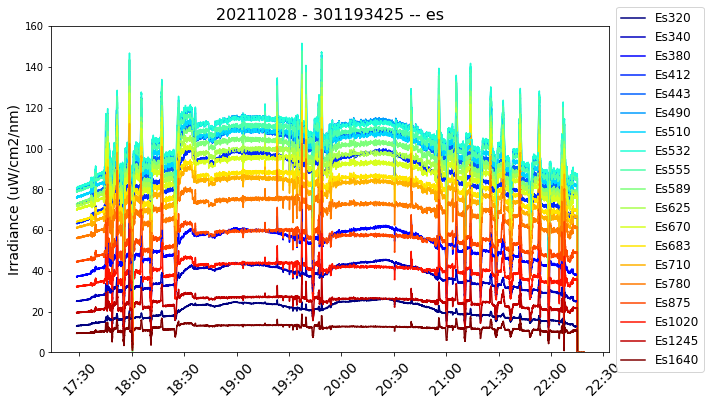

In [16]:
diry = diry+'/'
date = re.findall('[0-9]+', diry)[0]
flist = os.listdir(path+diry)
if not os.path.exists(outpath+diry):
    os.mkdir(outpath+diry)
    
fig, ax = plt.subplots(figsize=(10,6))
suffixes = ('Aux.csv','Log.csv','bunk')
for f in flist:
    if not f.endswith(suffixes):
        if not f.startswith('.'):
            print(f)
            
            name = f[:-4]
            file = path+diry+f
            data = pd.read_csv(file, sep=',', encoding='ISO-8859-1', index_col='DateTimeUTC')
            data.index = pd.to_datetime(data.index)
            
            sensors = {'es': data.iloc[:,5:24],
                        'li': data.iloc[:,24:43],
                        'lt': data.iloc[:,43:]}
            
           
            colormap = plt.cm.gist_ncar
            plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, sensors[sensor].shape[1]))))
            labels = []
            for i,b in enumerate(sensors[sensor].columns):
                ax.plot(data.index,data[b],)# marker='o',s=2)
                labels.append('{}'.format(b.split(' ')[0]))

# x-axis formatting
hour = mdates.HourLocator()   # every hour
mins = mdates.MinuteLocator(byminute=[0,30],interval=1)  # every minute
hourFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(mins)
ax.xaxis.set_major_formatter(hourFmt)

# other formatting
ax.legend(labels,loc='right',bbox_to_anchor=(1.18, .5),fontsize='large')
plt.xticks(rotation=45,fontsize=14)
ax.set_title('{} - {} -- {}'.format(date,name,sensor),fontsize=16)
if sensor == 'es':
    ax.set_ylabel('Irradiance (uW/cm2/nm)',fontsize=14)
    ax.set_ylim(0,160)
else:
    ax.set_ylabel('Radiance (uW/cm2/nm)',fontsize=14)
    ax.set_ylim(0,20)
fig.savefig('{}/{}_{}.png'.format(outpath+diry,name,sensor),bbox_inches='tight',dpi=300)